# Fake News Prediction

## Description


Develop a machine learning program to identify when an article might be fake or Real news. 

This CSV file contains the title and text of the news article, the author's name, and a label that identifies certain ideas in the article as Fake or Real. Most misinformation-related datasets will have a similar labeling and tabular structure- however, there are datasets with multiple labels that signify different levels of reliability.

## Attributes Variables

Id     -----> Unique Id for news Article

Title  -----> Title of News Article

Author -----> Author of News Article

Text   -----> The Text of the Article; could be incomplete

Label  -----> A label that marks whether the news article is real or fake

- 1: Fake news
- 0: Real News

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
import nltk
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [3]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Collection

In [4]:
# Load data from CSV file to Pandas Dataframe

fn=pd.read_csv(r"C:\Users\ADMIN\Downloads\Datasets\fake-news\train.csv")

In [5]:
# First Five rows of dataframe

fn.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# Some information about dataframe

fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 568.8+ KB


In [7]:
# No. of Features in dataframe

fn.shape

(20800, 5)

In [8]:
# Checking for missing values

fn.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Title, Author and Text column having a missing values

## Data Preprocessing

### Handling Null Values

In [9]:
# Replacing the null values with empty string

fn= fn.fillna(" ") 

Filling the missing values using the empty string

In [10]:
# Merging the author name and news title

fn['content'] = fn['author']+' '+fn['title']

In [11]:
print(fn["content"])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [12]:
fn.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [13]:
# Separating the data & label
X= fn.drop(columns= "label", axis=1)
Y= fn["label"]

In [14]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [15]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


### Stemming

#### Stemming is the process of reducing a word to its base or root form, by removing suffixes and prefixes.

In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    
    # Split the words into list
    stemmed_content = stemmed_content.split()
    
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    
    return stemmed_content

In [18]:
fn['content']= fn['content'].apply(stemming)

In [19]:
fn.content

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [20]:
# Separating the data & label
X= fn['content'].values
Y= fn['label'].values

In [21]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [22]:
print(Y)

[1 0 1 ... 0 1 1]


In [23]:
Y.shape

(20800,)

In [24]:
# Converting the textual data to numerical data
vectorizer= TfidfVectorizer()
vectorizer.fit(X)

TfidfVectorizer()

In [25]:
X= vectorizer.transform(X)

In [26]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

## Splitting the dataset to training & test data

In [27]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
def train(model , model_name):
    model.fit(X_train,Y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,Y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,Y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test
    )
def class_report(model):
    print(classification_report(
        Y_test,
        model.predict(X_test)
    ))

# Model Training

## 1. Logistic Regression

In [29]:
lr= LogisticRegression()

In [30]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [31]:
# Prediction on training data

y_train_pred = lr.predict(X_train)

In [32]:
# Accuracy on training data

print(accuracy_score(y_train_pred, Y_train))

0.9865985576923076


In [33]:
# Prediction on testing data

y_test_pred = lr.predict(X_test)

In [34]:
# Accuracy on testing data

print(accuracy_score(y_test_pred, Y_test))

0.9790865384615385


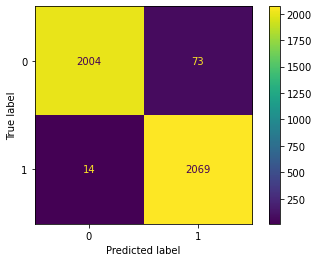

In [35]:
conf_matrix(lr)

In [36]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



## 2. SVM

In [37]:
svc= SVC(probability= True)

In [38]:
svc.fit(X_train, Y_train)

SVC(probability=True)

In [39]:
# Prediction on Training data

y_train_pred1 = svc.predict(X_train)

# Accuracy on training data

print(accuracy_score(y_train_pred1, Y_train))

0.9990985576923077


In [40]:
# Prediction on Testing data

y_test_pred1 = svc.predict(X_test)

# Accuracy on training data

print(accuracy_score(y_test_pred1, Y_test))

0.9889423076923077


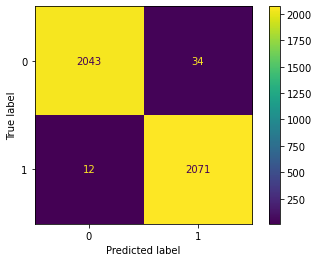

In [41]:
conf_matrix(svc)

In [42]:
class_report(svc)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2077
           1       0.98      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



#### Support vector machine classifier (SVM) does not directly provide probability estimates. so, to find probability possiblity for SVM we are use Caliberated Classifier.


In [43]:
# Import Calibrated Classifier

from sklearn.calibration import CalibratedClassifierCV

In [44]:
clf = CalibratedClassifierCV(svc)

In [45]:
clf.fit(X_train, Y_train)

CalibratedClassifierCV(base_estimator=SVC(probability=True))

In [46]:
CalibratedClassifierCV(base_estimator=SVC)

CalibratedClassifierCV(base_estimator=<class 'sklearn.svm._classes.SVC'>)

## 3. Descision Tree Classifier

In [47]:
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,Y_train)
    training_acc.append(tree_model.score(X_train,Y_train))
    testing_acc.append(tree_model.score(X_test,Y_test))

In [48]:
print("Training Accuracy Scores:", training_acc[:3])
print("Testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9962139423076923, 0.9966947115384616, 0.9971153846153846]
Testing Accuracy Scores: [0.9901442307692307, 0.9899038461538462, 0.9908653846153846]


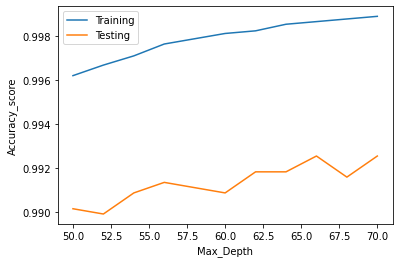

In [49]:
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend();

In [50]:
# final model
final_model_1=DecisionTreeClassifier(max_depth=70,random_state=42)
final_model_1.fit(X_train,Y_train)
tree_training_acc = final_model_1.score(X_train,Y_train)
tree_testing_acc = final_model_1.score(X_test,Y_test)
print(f"Training accuracy of Desicion Tree Classifier is {tree_training_acc}")
print(f"testing accuracy of Desicion Tree Classifier is {tree_testing_acc}")

Training accuracy of Desicion Tree Classifier is 0.9989182692307692
testing accuracy of Desicion Tree Classifier is 0.9925480769230769


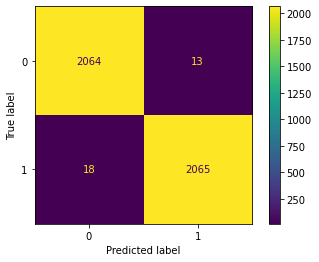

In [51]:
conf_matrix(final_model_1)

In [52]:
class_report(final_model_1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



## 4. Random Forest Classifier

In [53]:
depth_num= range(50, 75, 5)
training_acc= []
testing_acc = []
for depth in depth_num:
    rf_model = RandomForestClassifier(max_depth=depth,random_state=42)
    rf_model.fit(X_train,Y_train)
    training_acc.append(rf_model.score(X_train,Y_train))
    testing_acc.append(rf_model.score(X_test,Y_test))

In [54]:
print("Training Accuracy Scores:", training_acc[:3])
print("Testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9787860576923076, 0.9829927884615385, 0.9862980769230769]
Testing Accuracy Scores: [0.9670673076923076, 0.9733173076923077, 0.9754807692307692]


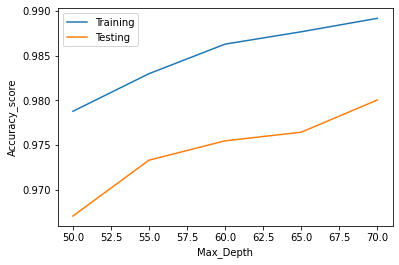

In [55]:
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend();

In this graph we can see that training has high accuracy as compare to testing at same depth.

In [56]:
# final model
final_model_2=RandomForestClassifier(max_depth=70,random_state=42)
final_model_2.fit(X_train,Y_train)
training_acc = final_model_2.score(X_train,Y_train)
testing_acc = final_model_2.score(X_test,Y_test)
print(f"Training accuracy of Random Forest Classifier is {training_acc}")
print(f"testing accuracy of Random Forest Classifier is {testing_acc}")

Training accuracy of Random Forest Classifier is 0.9891826923076923
testing accuracy of Random Forest Classifier is 0.9800480769230769


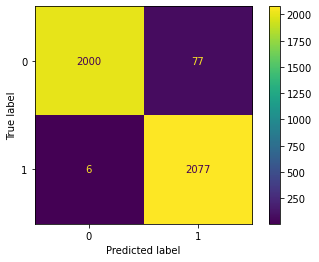

In [57]:
conf_matrix(final_model_2)

In [58]:
class_report(final_model_2)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2077
           1       0.96      1.00      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



## Hyperparameter Tuning using GridSearchCV

In [59]:
clf= RandomForestClassifier(random_state=42)
params={
    "n_estimators": range(50,125,25),
    "max_depth": range(60,81,2)
}
params

{'n_estimators': range(50, 125, 25), 'max_depth': range(60, 81, 2)}

In [60]:
rf_grid = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)

In [61]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(60, 81, 2),
                         'n_estimators': range(50, 125, 25)},
             verbose=1)

In [62]:
cv_results= pd.DataFrame(rf_grid.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,26.744330,0.090141,0.190811,0.001327,78,75,"{'max_depth': 78, 'n_estimators': 75}",0.975962,0.980769,0.983774,0.982272,0.977464,0.980048,0.002923,1
29,35.818481,1.420274,0.234121,0.040801,78,100,"{'max_depth': 78, 'n_estimators': 100}",0.974459,0.981070,0.986178,0.980168,0.977163,0.979808,0.003947,2
32,42.974367,5.364150,0.378970,0.244697,80,100,"{'max_depth': 80, 'n_estimators': 100}",0.975361,0.978966,0.985877,0.979267,0.979267,0.979748,0.003403,3
31,27.654447,0.425958,0.210840,0.027677,80,75,"{'max_depth': 80, 'n_estimators': 75}",0.975361,0.977163,0.984075,0.979868,0.978966,0.979087,0.002935,4
27,17.873622,0.143494,0.128607,0.001020,78,50,"{'max_depth': 78, 'n_estimators': 50}",0.975060,0.979868,0.984075,0.977764,0.977464,0.978846,0.003026,5
23,34.442370,0.239378,0.253615,0.013246,74,100,"{'max_depth': 74, 'n_estimators': 100}",0.975661,0.976863,0.984675,0.979567,0.976863,0.978726,0.003239,6
26,35.147010,0.430062,0.253015,0.003099,76,100,"{'max_depth': 76, 'n_estimators': 100}",0.973858,0.977163,0.985577,0.978065,0.977464,0.978425,0.003864,7
22,26.138695,0.258591,0.200011,0.012507,74,75,"{'max_depth': 74, 'n_estimators': 75}",0.975361,0.977464,0.982272,0.979567,0.976863,0.978305,0.002399,8
25,26.235501,0.267882,0.195011,0.005797,76,75,"{'max_depth': 76, 'n_estimators': 75}",0.974760,0.976562,0.983173,0.979567,0.977163,0.978245,0.002905,9
19,25.450256,0.157379,0.186811,0.001600,72,75,"{'max_depth': 72, 'n_estimators': 75}",0.974760,0.976863,0.983774,0.978365,0.976262,0.978005,0.003108,10


In [63]:
rf_grid.best_params_

{'max_depth': 78, 'n_estimators': 75}

In [64]:
acc_train = rf_grid.score(X_train , Y_train)
acc_test = rf_grid.score(X_test , Y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"Test accuracy: {round(acc_test , 4)}")

Training accuracy: 0.991
Test accuracy: 0.9817


In [65]:
rf_grid.best_params_

{'max_depth': 78, 'n_estimators': 75}

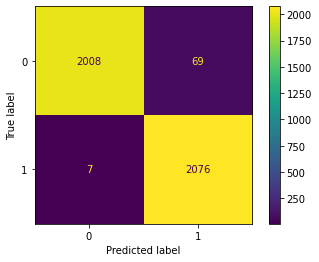

In [66]:
conf_matrix(rf_grid)

In [67]:
class_report(rf_grid)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2077
           1       0.97      1.00      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [68]:
models = pd.DataFrame({
    
    "Models": ["Logestic Regression" , "SVM", "DecisionTreeClassifier","RandomForestClassifier"],
    "Score":[lr.score(X_test,Y_test) ,svc.score(X_test,Y_test) ,tree_testing_acc,acc_test ]
    
})
models.sort_values(by="Score" , ascending=False)

,Models,Score
2,DecisionTreeClassifier,0.992548
1,SVM,0.988942
3,RandomForestClassifier,0.981731
0,Logestic Regression,0.979087


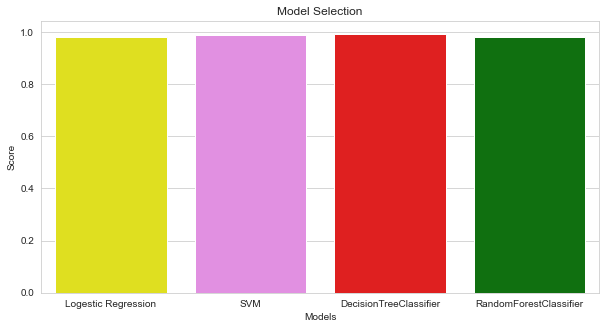

In [69]:
colors= ['yellow' , 'violet', 'red', 'green']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show();

## Receiving Operating Characterstic Curve (ROC) and Area Under the Curve (AUC)

In [70]:
# Prediction Probability for Random Prediction
r_probs=[0 for _ in range(len(Y_test))]

# Prediction Probabilities for models
lr_probs= lr.predict_proba(X_test)
final_model_1_probs= final_model_1.predict_proba(X_test)
svc_probs= svc.predict_proba(X_test)
final_model_2_probs= final_model_2.predict_proba(X_test)

In [71]:
# Probabilities for positive outcome

lr_probs = lr_probs[:, 1]
final_model_1_probs = final_model_1_probs[:, 1]
svc_probs = svc_probs[:, 1]
final_model_2_probs = final_model_2_probs[:,1]

### Calculate AUCROC

In [72]:
# AUCROC Score for Random Prediction
r_auc = roc_auc_score(Y_test, r_probs)

#AUCROC Score for Random Prediction
lr_auc = roc_auc_score(Y_test,lr_probs)
final_model_1_auc = roc_auc_score(Y_test,final_model_1_probs)
svc_auc = roc_auc_score(Y_test,svc_probs)
final_model_2_auc = roc_auc_score(Y_test,final_model_2_probs)

In [73]:
#Print AUCROC Score for Random Prediction
print("Random Prediction: AUCROC = %.2f" %(r_auc))

# Print AUCROC Score for models
print("Logistic regression: AUCROC = %.2f" %(lr_auc))
print("Decision Tree: AUCROC = %.2f" %(final_model_1_auc))
print("Support Vector Classifier: AUCROC = %.2f" %(svc_auc))
print("Random Forest: AUCROC = %.2f" %(final_model_2_auc))

Random Prediction: AUCROC = 0.50
Logistic regression: AUCROC = 1.00
Decision Tree: AUCROC = 0.99
Support Vector Classifier: AUCROC = 1.00
Random Forest: AUCROC = 1.00


### Calculate ROC Curve

In [74]:
# ROC Curves for Random Prediction
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)

# ROC Curves for all models
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
final_model_1_fpr, final_model_1_tpr, _ = roc_curve(Y_test, final_model_1_probs)
svc_fpr, svc_tpr, _ = roc_curve(Y_test, svc_probs)
final_model_2_fpr, final_model_2_tpr,_ = roc_curve(Y_test, final_model_2_probs)

### Plot ROC Curve

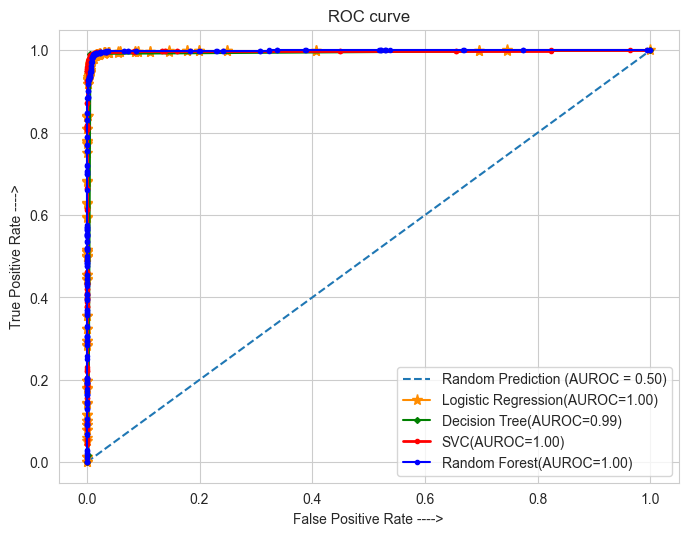

In [75]:
plt.figure(figsize=(8,6),dpi=100)

# Title
plt.title('ROC curve')

# Axis label
plt.xlabel('False Positive Rate ---->')
plt.ylabel('True Positive Rate ---->')

# Plot ROC Curves

plt.plot(r_fpr, r_tpr, ls="--", label="Random Prediction (AUROC = %0.2f)" % r_auc)

plt.plot(lr_fpr, lr_tpr, c="darkorange", label="Logistic Regression(AUROC=%0.2f)" % lr_auc, marker="*",markersize=8)

plt.plot(final_model_1_fpr, final_model_1_tpr, c="green", label="Decision Tree(AUROC=%0.2f)" % final_model_1_auc, marker="D", markersize=3)

plt.plot(svc_fpr, svc_tpr, c="red", label="SVC(AUROC=%0.2f)" % svc_auc, lw=2, marker="o", markersize=3)

plt.plot(final_model_2_fpr, final_model_2_tpr, c="blue", label="Random Forest(AUROC=%0.2f)" % final_model_2_auc, marker="o", markersize=3)

plt.legend()
plt.show()

Logistic Regression, Decision,Random Forest provided the best performance it occupies the curve for left and the top and Area under the curve is essentialy 1.0

# Making Predictive System

In [76]:
X_new = X_test[7]

Prediction = final_model_1.predict(X_new)
print(Prediction)

if (Prediction[0]==0):
    print("The news is Real")
else:
    print("The news is fake")

[0]
The news is Real
